# PCA Projection in Python: Visualizing High-Dimensional Data
## What is PCA Projection?
Principal Component Analysis (PCA) projection is a technique for reducing high-dimensional data to fewer dimensions while preserving as much variance as possible. By projecting data onto principal components (directions of maximum variance), we can visualize and analyze complex datasets in 2D or 3D space.
PCA projection transforms your data from its original feature space into a new coordinate system where:

The first principal component captures the most variance
The second captures the second-most variance (orthogonal to the first)
And so on...

## Why Use PCA Projection?
PCA projection is invaluable for:

- Visualization: Plot high-dimensional data in 2D or 3D
- Noise reduction: Filter out low-variance components
- Feature extraction: Create informative composite features
- Exploratory analysis: Understand data structure and clustering
- Preprocessing: Reduce dimensionality before machine learning

##  Basic PCA Projection with Scikit-learn
Let's start with a simple example using the Iris dataset:

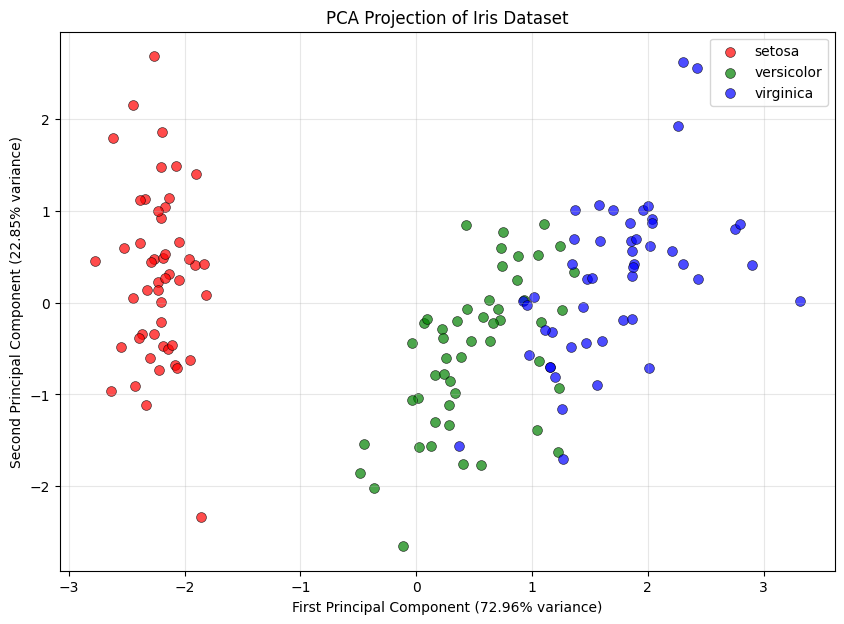

Total variance explained: 95.81%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=colors[i], alpha=0.7, s=50,
                label=target_name, edgecolors='black', linewidth=0.5)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Projection of Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

# Understanding Explained Variance
Visualizing how much information each component captures:

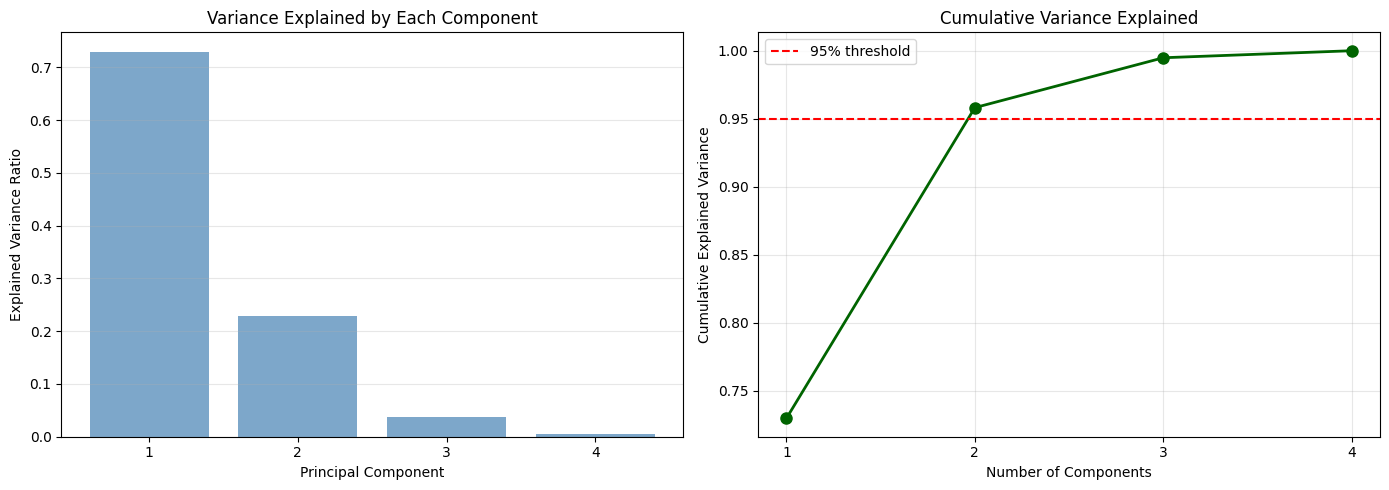

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and scale data
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)

# Fit PCA with all components
pca = PCA()
pca.fit(X_scaled)

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
axes[0].bar(range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Variance Explained by Each Component')
axes[0].set_xticks(range(1, len(pca.explained_variance_ratio_) + 1))
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Variance Explained')
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3D PCA Projection
Visualizing data in three dimensions:

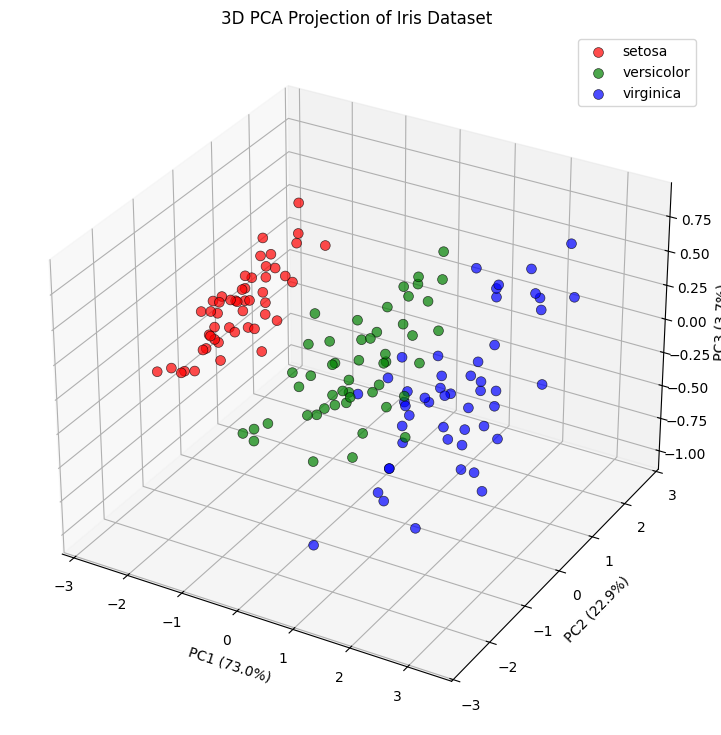

Total variance explained by 3 components: 99.48%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and prepare data
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)

# Apply 3D PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
for i, target_name in enumerate(iris.target_names):
    indices = iris.target == i
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2],
               c=colors[i], label=target_name, s=50, alpha=0.7, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})')
ax.set_title('3D PCA Projection of Iris Dataset')
ax.legend()
plt.show()

print(f"Total variance explained by 3 components: {sum(pca.explained_variance_ratio_):.2%}")

PCA with Feature Contributions (Biplots)
Understanding which original features contribute to each component:

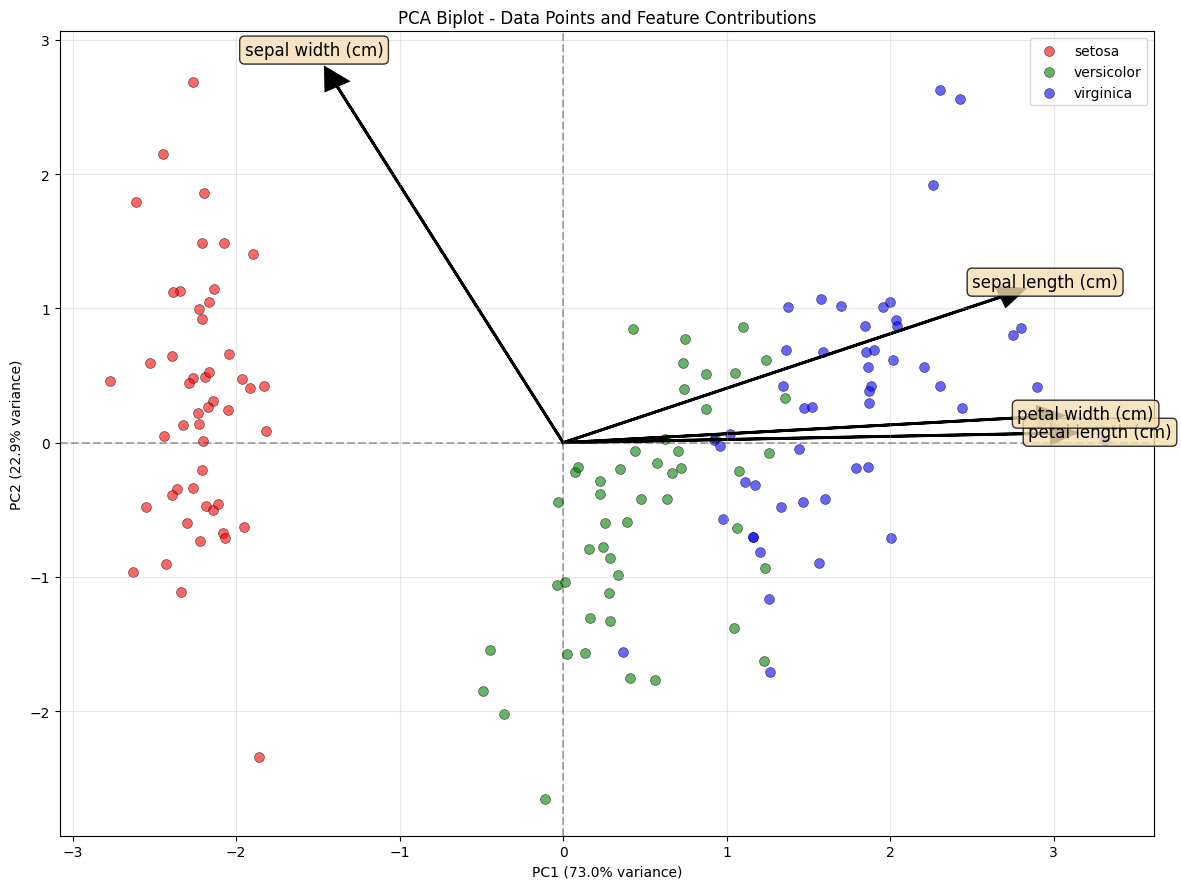

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load data
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create biplot
fig, ax = plt.subplots(figsize=(12, 9))

# Plot data points
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(iris.target_names):
    indices = iris.target == i
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1],
               c=colors[i], label=target_name, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Plot feature vectors
feature_vectors = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, (vector, feature) in enumerate(zip(feature_vectors, iris.feature_names)):
    ax.arrow(0, 0, vector[0] * 3, vector[1] * 3,
             head_width=0.15, head_length=0.15, fc='black', ec='black', linewidth=2)
    ax.text(vector[0] * 3.3, vector[1] * 3.3, feature,
            fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_title('PCA Biplot - Data Points and Feature Contributions')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# PCA on High-Dimensional Data
Example with more features (wine dataset):

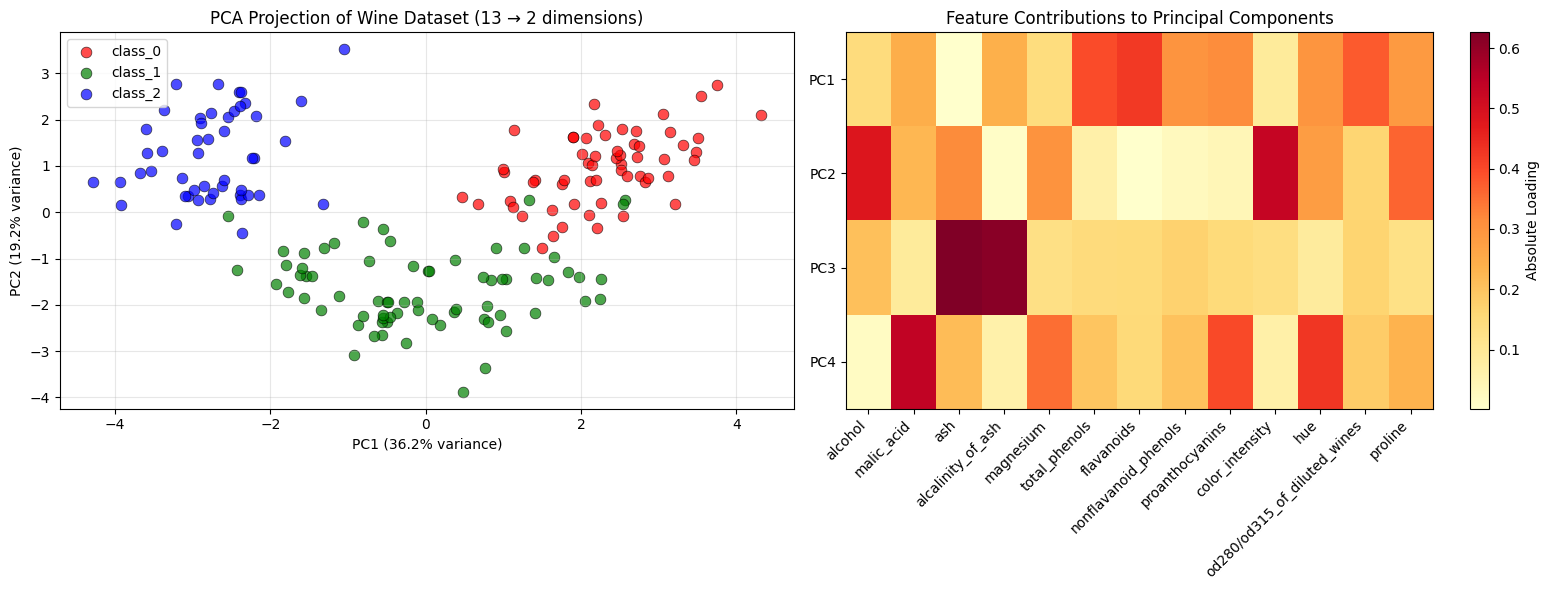

Original dimensions: 13
Reduced dimensions: 2
Variance retained: 55.41%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load wine dataset (13 features)
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA projection
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    indices = y == i
    axes[0].scatter(X_pca[indices, 0], X_pca[indices, 1],
                    c=colors[i], label=target_name, alpha=0.7, s=60,
                    edgecolors='black', linewidth=0.5)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('PCA Projection of Wine Dataset (13 → 2 dimensions)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Feature importance heatmap
pca_full = PCA()
pca_full.fit(X_scaled)
components = pca_full.components_[:4]  # First 4 components

im = axes[1].imshow(np.abs(components), cmap='YlOrRd', aspect='auto')
axes[1].set_xticks(range(len(wine.feature_names)))
axes[1].set_xticklabels(wine.feature_names, rotation=45, ha='right')
axes[1].set_yticks(range(4))
axes[1].set_yticklabels([f'PC{i+1}' for i in range(4)])
axes[1].set_title('Feature Contributions to Principal Components')
plt.colorbar(im, ax=axes[1], label='Absolute Loading')

plt.tight_layout()
plt.show()

print(f"Original dimensions: {X.shape[1]}")
print(f"Reduced dimensions: 2")
print(f"Variance retained: {sum(pca.explained_variance_ratio_):.2%}")

# PCA for Image Data
Applying PCA to image datasets:

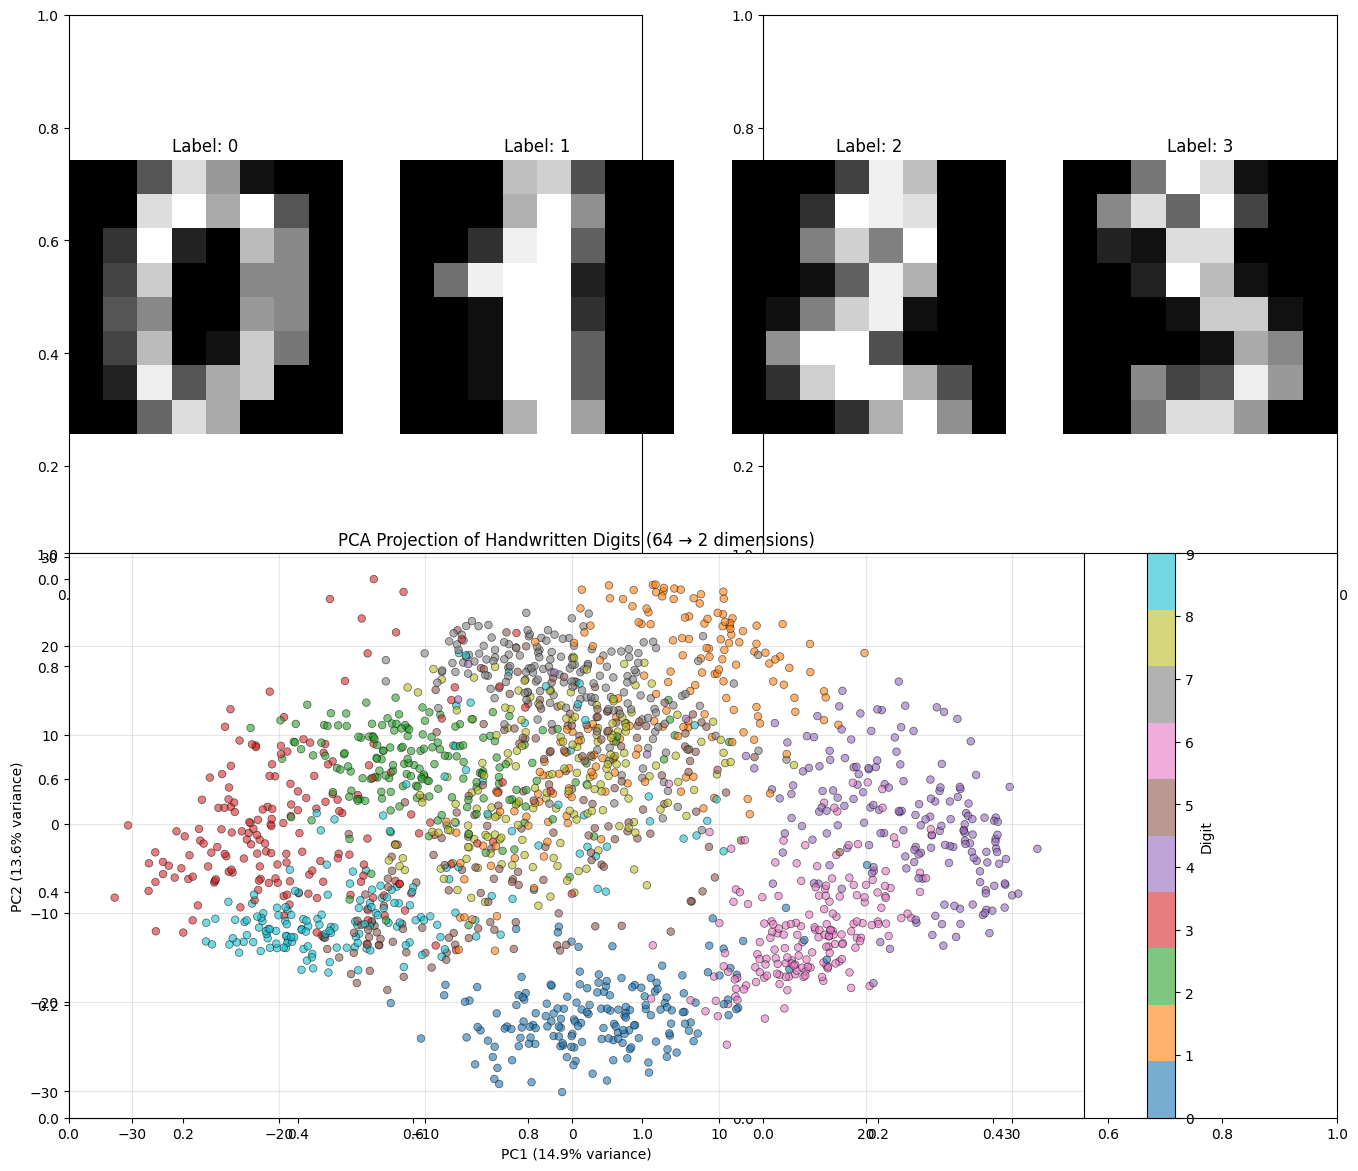

Original dimensions: 64 (8x8 pixels)
Variance explained by 2 components: 28.51%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load digits dataset (64 features = 8x8 pixel images)
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Sample images
for i in range(4):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

# PCA projection
ax_pca = plt.subplot(2, 1, 2)
scatter = ax_pca.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10',
                         alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax_pca.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax_pca.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax_pca.set_title('PCA Projection of Handwritten Digits (64 → 2 dimensions)')
ax_pca.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax_pca, label='Digit', ticks=range(10))

plt.tight_layout()
plt.show()

print(f"Original dimensions: {X.shape[1]} (8x8 pixels)")
print(f"Variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

# Practical Applications
1. Exploratory Data Analysis
Quickly visualize high-dimensional datasets to identify clusters, outliers, and patterns.
2. Feature Engineering
Create new features that capture the most important variations in your data.
3. Noise Reduction
Remove low-variance components that likely represent noise rather than signal.
4. Visualization
Make high-dimensional data interpretable through 2D or 3D projections.
5. Preprocessing for ML
Reduce dimensionality before applying machine learning algorithms, improving speed and reducing overfitting.

# Best Practices for PCA Projection
1. Always Standardize
- pythonfrom sklearn.preprocessing import StandardScaler
- X_scaled = StandardScaler().fit_transform(X)
- PCA is sensitive to scale - features with larger ranges will dominate.
2. Check Explained Variance
- pythonprint(f"Variance explained: {sum(pca.explained_variance_ratio_):.2%}")
- Aim for 80-95% of variance explained, depending on your application.
3. Interpret Components
Look at loadings to understand what each component represents.
4. Validate Results
Compare PCA projections with domain knowledge and other visualization methods.
5. Consider Non-Linear Alternatives
For complex, non-linear data, consider t-SNE, UMAP, or kernel PCA.

# Common Pitfalls

- Forgetting to standardize: Features with different scales will bias PCA
- Over-interpreting 2D projections: Information loss is inevitable
- Ignoring explained variance: Low variance retained means poor representation
- Using PCA blindly: Not all datasets benefit from PCA
- Misunderstanding components: They're mathematical constructs, not always interpretable

